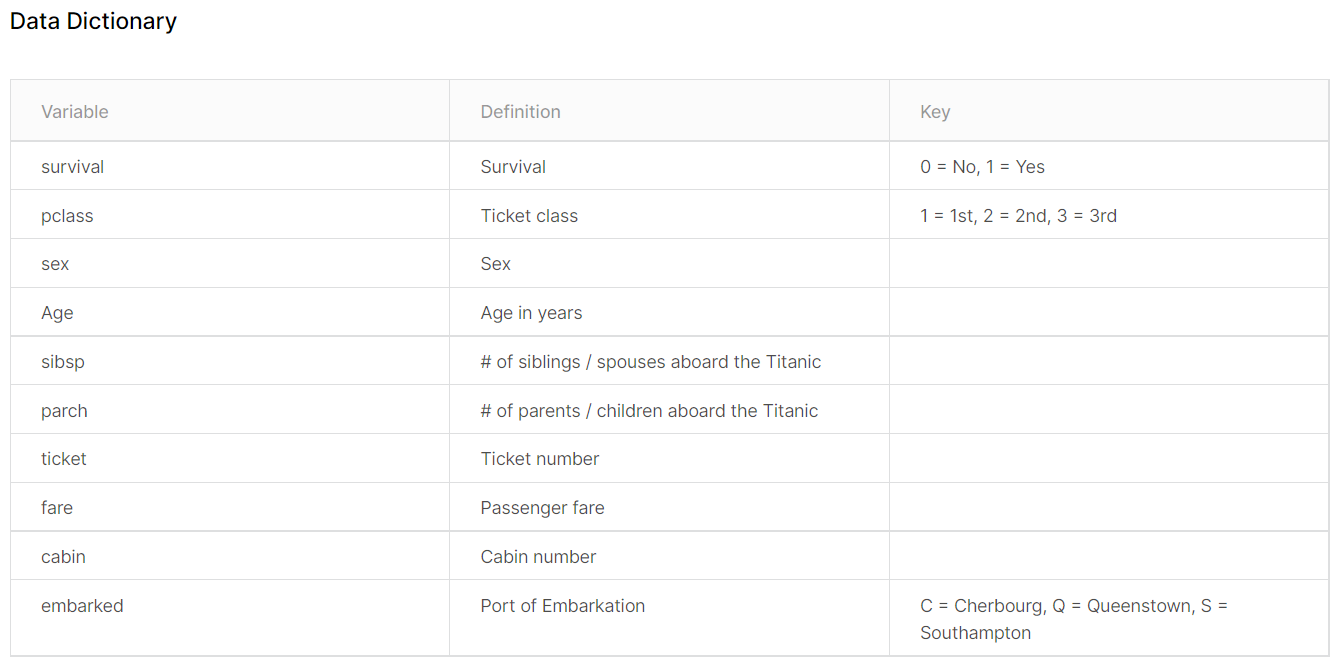

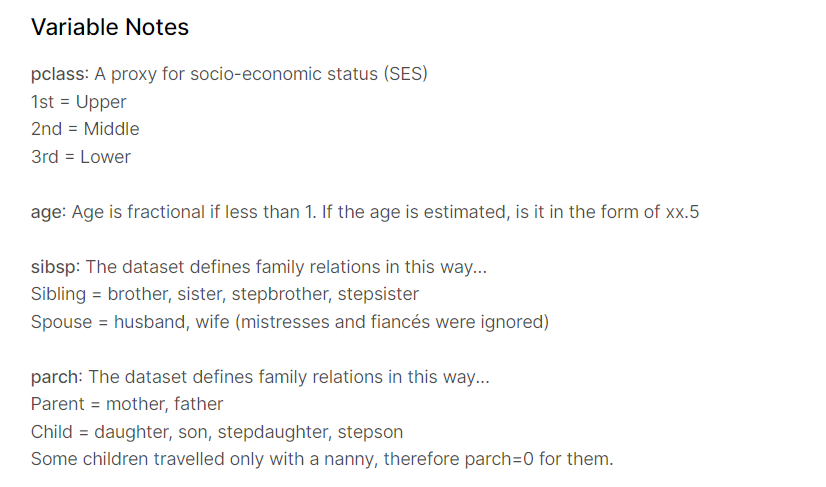

In [1169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [1170]:
train_df = pd.read_csv("../../datasets/Titanic/train.csv")
test_df = pd.read_csv("../../datasets/Titanic/test.csv")
submission_df = pd.read_csv("../../datasets/Titanic/gender_submission.csv")

In [1171]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1172]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1173]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1174]:
train_df.shape

(891, 12)

In [1175]:
test_df.shape

(418, 11)

In [1176]:
train_df.columns.difference(test_df.columns)

Index(['Survived'], dtype='object')

### Let's analyze the Target variable
The data represents survival rate of 40%

In [1177]:
train_df['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

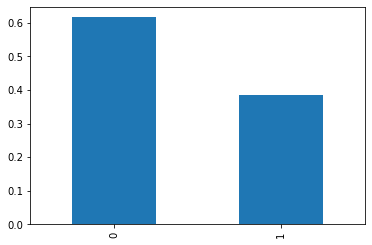

In [1178]:
train_df['Survived'].value_counts(dropna=False,normalize=True).plot(kind='bar')

In [1179]:
train_df.duplicated().sum()

0

In [1180]:
test_df.duplicated().sum()

0

In [1181]:
pd.concat([train_df,test_df]).duplicated().sum()

0

In [1182]:
train_df['source'] = 'train'
test_df['source'] = 'test'

In [1183]:
df = pd.concat([train_df,test_df],axis=0)

In [1184]:
df.reset_index(inplace=True, drop=True)

<AxesSubplot:>

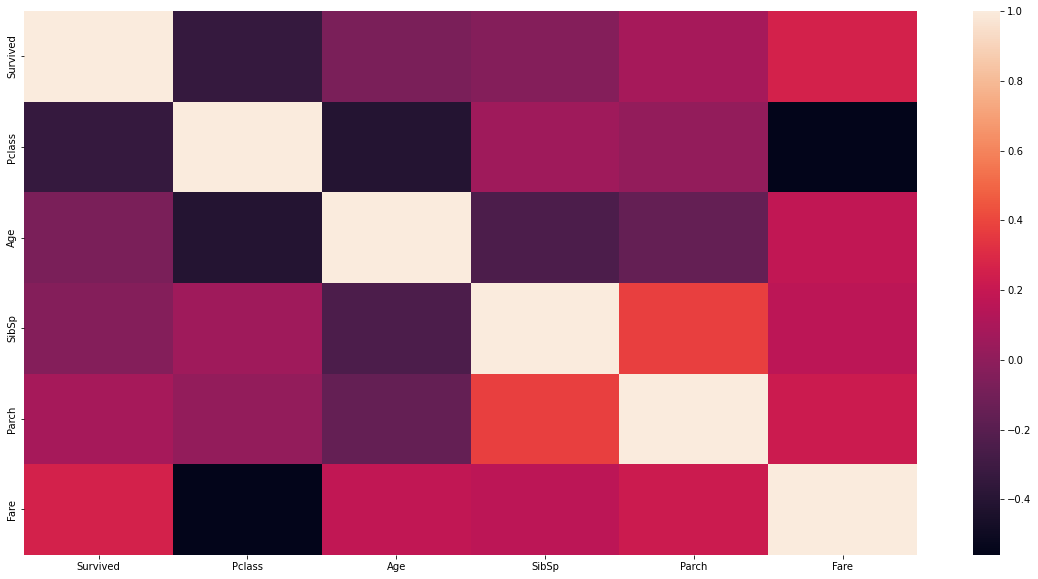

In [1185]:
plot.figure(figsize=(20,10))
sns.heatmap(df.drop(columns=['PassengerId']).corr())

In [1186]:
#sns.pairplot(df.drop(columns=['PassengerId']))

In [1187]:
df.shape

(1309, 13)

In [1188]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [1189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [1190]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [1191]:
df.describe(include='object').T

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914
source,1309,2,train,891


In [1192]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


### Univeriate analysis for independent categorical nomial features like : Sex, Embarked
1. we have more males in the ship i.e. 60% of the population are male
2. Embarked locations, s : 70%, C:20%, Q:10% got onboarded

In [1193]:
df['Sex'].value_counts(dropna=False)

male      843
female    466
Name: Sex, dtype: int64

<AxesSubplot:>

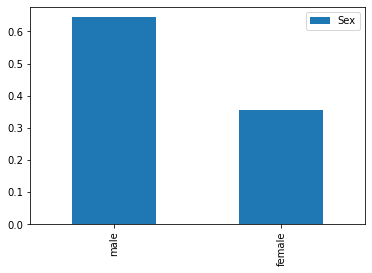

In [1194]:
df['Sex'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1195]:
df['Embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

<AxesSubplot:>

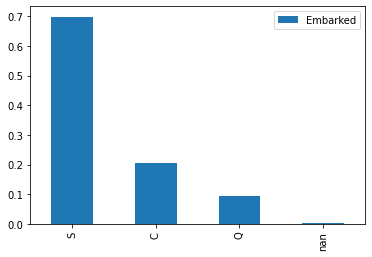

In [1196]:
df['Embarked'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

### Univeriate analysis for independent categorical ordinal features like : Pclass, SibSp, Parch
1. Each class has different members. 3: 55%, 1: 25%, 1: 20%
2. SibSp : No siblings or Spouse or only 1 has more participants
3. most of the persons in the crew has : 0-2 parents/child

In [1197]:
df['Pclass'].value_counts(dropna=False)

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

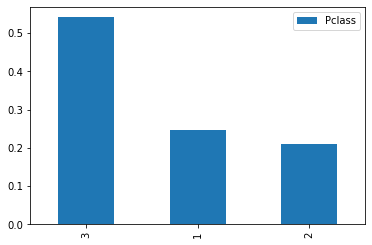

In [1198]:
df['Pclass'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

<AxesSubplot:>

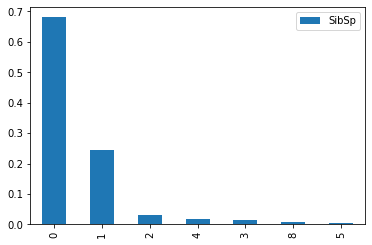

In [1199]:
df['SibSp'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1200]:
df['Parch'].value_counts(dropna=False)

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

<AxesSubplot:>

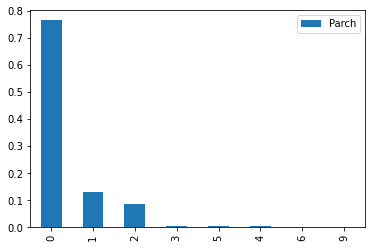

In [1201]:
df['Parch'].value_counts(normalize=True,dropna=False).plot(kind='bar',legend=True)

In [1202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


#### Univeriate analysis for independent numberical features like : ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term
1. Fare us vert much towards left, log of it has normal distribution
2. Age is normally distributed

<AxesSubplot:>

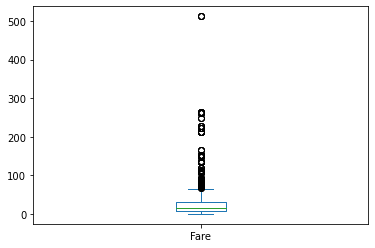

In [1203]:
df['Fare'].plot(kind='box')

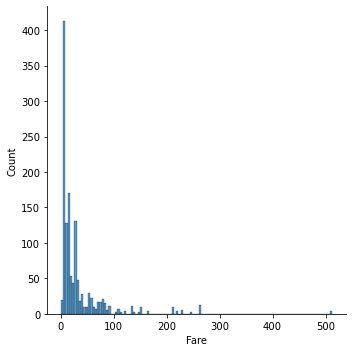

In [1204]:
sns.displot(df['Fare'])

In [1205]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [1206]:
df['Fare'] =df['Fare'].replace(0,1)

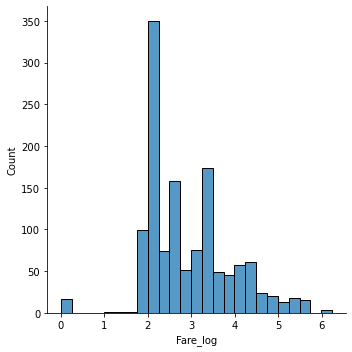

In [1207]:
df['Fare_log'] = np.log(df['Fare'])
sns.displot(df['Fare_log'])

<AxesSubplot:>

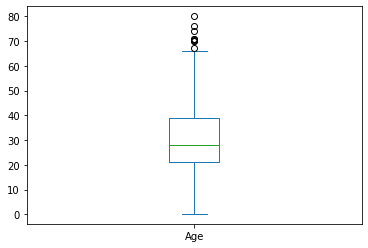

In [1208]:
df['Age'].plot(kind='box')

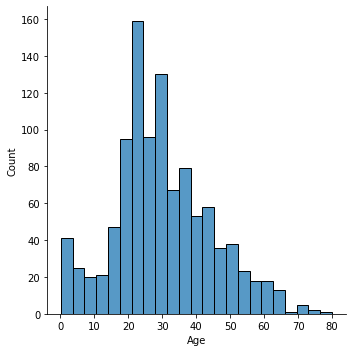

In [1209]:
sns.displot(df['Age'])

### Let's do bivariate analysis to check on our Hypothesis.

### Categorical independent variable vs Target Variable (  Gender, Married, Self_Employed, Education, Credit_history, Dependents, Education, Property_Area)
1. Females have high survival rate
2. Class 1 has high survival rate and class 3 has least survival rate
3. embarked at C has high surival rate
4. lesser the sbsp, higher survival rate
5. prch with 2-3 has more survival rate.
6. sub urban properties have more chances of loan approval when compare to others.
7. dependents don't have much importance in loan approval

<AxesSubplot:xlabel='Sex'>

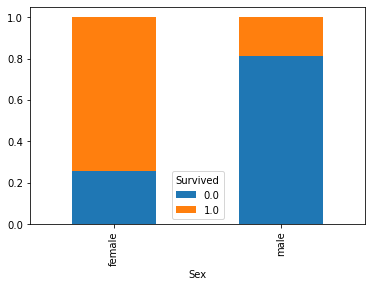

In [1210]:
Sex = pd.crosstab(df['Sex'],df['Survived'])
Sex.div(Sex.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Pclass'>

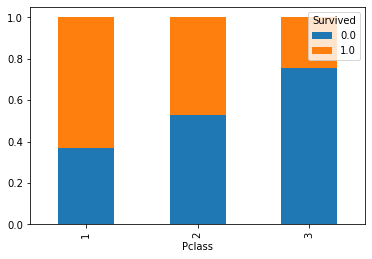

In [1211]:
Pclass = pd.crosstab(df['Pclass'],df['Survived'])
Pclass.div(Pclass.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Embarked'>

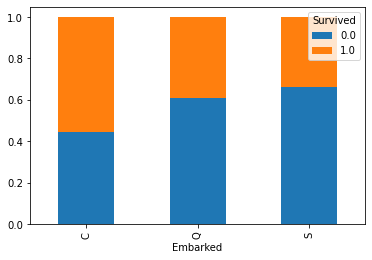

In [1212]:
Embarked = pd.crosstab(df['Embarked'],df['Survived'])
Embarked.div(Embarked.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='SibSp'>

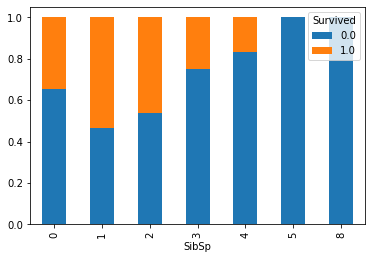

In [1213]:
SibSp = pd.crosstab(df['SibSp'],df['Survived'])
SibSp.div(SibSp.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Parch'>

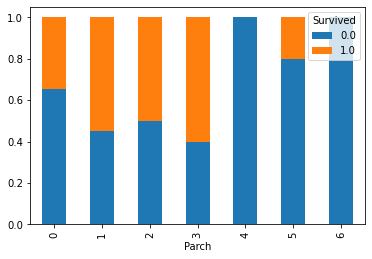

In [1214]:
Parch = pd.crosstab(df['Parch'],df['Survived'])
Parch.div(Parch.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

### Numerical dependent variable vs Target variable
1. Higher Fare slabs has higher survival rate
2. kids has more survival rate. 

In [1215]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'source', 'Fare_log'],
      dtype='object')

In [1216]:
df['Fare'].describe()

count    1309.000000
mean       33.308466
std        51.730638
min         1.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [1217]:
bins = [0,15,25,35,512]
group = ['Low','Medium','High','Very High']
df['Fare_slabs'] = pd.cut(df['Fare'],bins,labels=group)

<AxesSubplot:xlabel='Fare_slabs'>

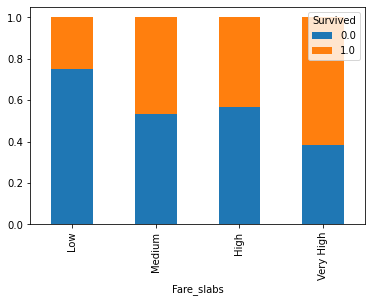

In [1218]:
Fare_slabs = pd.crosstab(df['Fare_slabs'],df['Survived'])
Fare_slabs.div(Fare_slabs.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1219]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

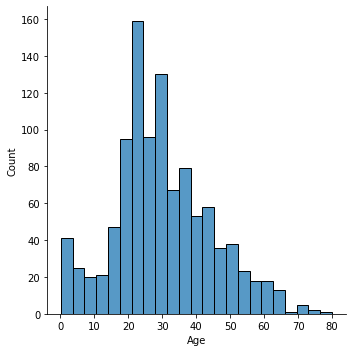

In [1220]:
sns.displot(df['Age'])

In [1221]:
bins = [0,12,19,30,45,80]
group = ['kids','teenage','youth','MiddleAge','old']
df['Age_slabs'] = pd.cut(df['Age'],bins,labels=group)

<AxesSubplot:xlabel='Age_slabs'>

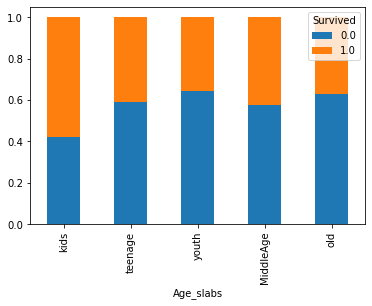

In [1222]:
Age_slabs = pd.crosstab(df['Age_slabs'],df['Survived'])
Age_slabs.div(Age_slabs.sum(1).astype('float'),axis=0).plot(kind='bar', stacked=True)

In [1223]:
df.drop(columns=['Age_slabs', 'Fare_slabs'],inplace=True)

<AxesSubplot:>

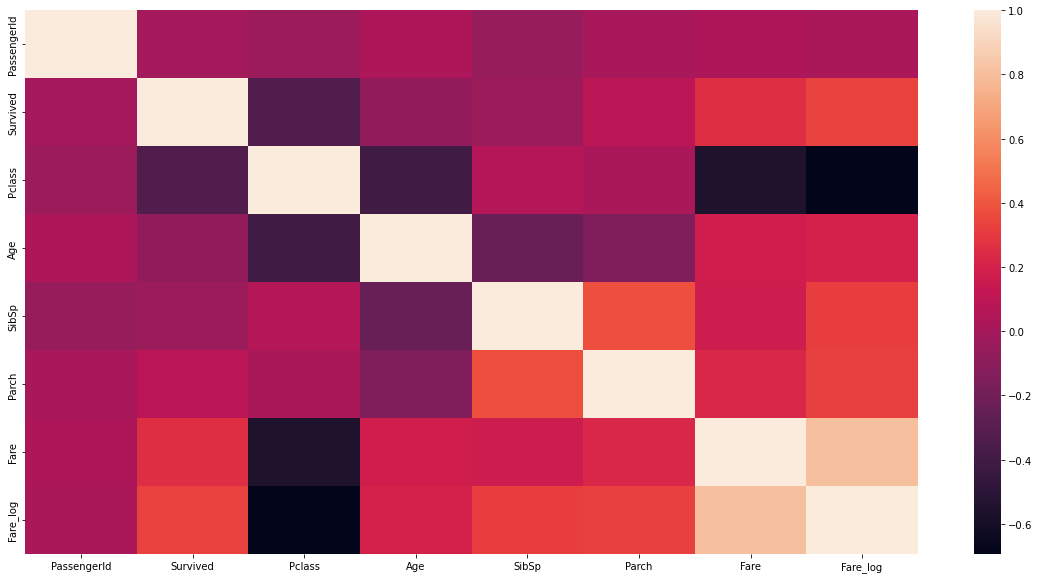

In [1224]:
plot.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [1225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,1.981001
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,4.266662
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,2.070022
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,3.972177
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,2.085672


In [1226]:
df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [1227]:
df['Age'].mode()[0]

24.0

In [1228]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [1229]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [1230]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
source           0
Fare_log         0
dtype: int64

In [1231]:
df_cat = df.select_dtypes(include='object')
df_cat

,Sex,Embarked,source
0,male,S,train
1,female,C,train
2,female,S,train
3,female,S,train
4,male,S,train
...,...,...,...
1304,male,S,test
1305,female,C,test
1306,male,S,test
1307,male,S,test


In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   source       1309 non-null   object 
 10  Fare_log     1309 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 112.6+ KB


In [1233]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
source           0
Fare_log         0
dtype: int64

In [1234]:
df_categorical = df[['Pclass','Sex','Embarked']]
df_cat_conv = pd.get_dummies(df_categorical)

In [1235]:
df_cat_conv.head().T

,0,1,2,3,4
Pclass,3,1,3,1,3
Sex_female,0,1,1,1,0
Sex_male,1,0,0,0,1
Embarked_C,0,1,0,0,0
Embarked_Q,0,0,0,0,0
Embarked_S,1,0,1,1,1


In [1236]:
df_cat_conv.columns

Index(['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [1237]:
df = pd.concat([df, df_cat_conv],axis=1)

In [1238]:
cat_col = ['Pclass','Sex','Embarked']

In [1239]:
df.drop(columns=cat_col, inplace=True)

In [1240]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,source,Fare_log,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,22.0,1,0,7.2500,train,1.981001,0,1,0,0,1
1,2,1.0,38.0,1,0,71.2833,train,4.266662,1,0,1,0,0
2,3,1.0,26.0,0,0,7.9250,train,2.070022,1,0,0,0,1
3,4,1.0,35.0,1,0,53.1000,train,3.972177,1,0,0,0,1
4,5,0.0,35.0,0,0,8.0500,train,2.085672,0,1,0,0,1


In [1241]:
tobescaled_df = df[['Age','Fare']]
sc = StandardScaler()
#sc = MinMaxScaler()
scaled_df = sc.fit_transform(tobescaled_df)

In [1242]:

df[['Age','Fare']] = scaled_df

In [1243]:
df[['Age','Fare']].head()

,Age,Fare
0,-0.511722,-0.503926
1,0.710389,0.734368
2,-0.206195,-0.490873
3,0.481243,0.382734
4,0.481243,-0.488456


In [1244]:
train_df = df[df['source']=='train']
test_df = df[df['source']=='test']
test_df.reset_index(inplace=True, drop=True)
train_df.reset_index(inplace=True, drop=True)

In [1245]:
train_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

#### We could see 0 and 1 samples are not equal, let's try to over sable the promoted =1 rows

In [1246]:
loan = train_df[train_df['Survived'] == 1]
no_loan = train_df[train_df['Survived'] == 0]

In [1247]:
loan.shape, no_loan.shape

((342, 13), (549, 13))

In [1248]:
no_loan = no_loan.sample(loan.shape[0], replace=True)
no_loan.shape

(342, 13)

In [1249]:
train_df = pd.concat([loan, no_loan],axis=0)

In [1250]:
train_df.shape

(684, 13)

In [1251]:
X = train_df.drop(columns=['source','PassengerId','Survived'])
y = train_df['Survived']

In [1252]:
y.unique()

array([1., 0.])

In [1253]:
df.corr().T

,PassengerId,Survived,Age,SibSp,Parch,Fare,Fare_log,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,0.025655,-0.055224,0.008942,0.031383,0.019327,-0.013406,0.013406,0.048101,0.011585,-0.049836
Survived,-0.005007,1.000000,-0.052872,-0.035322,0.081629,0.257141,0.331805,0.543351,-0.543351,0.168240,0.003650,-0.149683
Age,0.025655,-0.052872,1.000000,-0.186248,-0.113955,0.192287,0.207601,-0.045259,0.045259,0.071753,-0.069303,-0.019224
SibSp,-0.055224,-0.035322,-0.186248,1.000000,0.373587,0.160129,0.315617,0.109609,-0.109609,-0.048396,-0.048678,0.073709
Parch,0.008942,0.081629,-0.113955,0.373587,1.000000,0.221445,0.326935,0.213125,-0.213125,-0.008635,-0.100943,0.071881
Fare,0.031383,0.257141,0.192287,0.160129,0.221445,1.000000,0.801989,0.185327,-0.185327,0.286158,-0.130156,-0.169757
Fare_log,0.019327,0.331805,0.207601,0.315617,0.326935,0.801989,1.000000,0.250914,-0.250914,0.280473,-0.195188,-0.123340
Sex_female,-0.013406,0.543351,-0.045259,0.109609,0.213125,0.185327,0.250914,1.000000,-1.000000,0.066564,0.088651,-0.115193
Sex_male,0.013406,-0.543351,0.045259,-0.109609,-0.213125,-0.185327,-0.250914,-1.000000,1.000000,-0.066564,-0.088651,0.115193
Embarked_C,0.048101,0.168240,0.071753,-0.048396,-0.008635,0.286158,0.280473,0.066564,-0.066564,1.000000,-0.164166,-0.778262


In [1254]:
df.isna().sum()

PassengerId      0
Survived       418
Age              0
SibSp            0
Parch            0
Fare             0
source           0
Fare_log         0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [1255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=10)
#X_train = X
#y_test = y

In [1256]:
X_train.head().T

,446,527,581,673,224
Age,-1.199160,-0.358959,0.786771,0.175715,0.710389
SibSp,0.000000,0.000000,1.000000,0.000000,1.000000
Parch,1.000000,0.000000,1.000000,0.000000,0.000000
Fare,-0.267032,3.644702,1.500165,-0.392731,1.096317
Fare_log,2.970414,5.401682,4.708478,2.564949,4.499810
Sex_female,1.000000,0.000000,1.000000,0.000000,0.000000
Sex_male,0.000000,1.000000,0.000000,1.000000,1.000000
Embarked_C,0.000000,0.000000,1.000000,0.000000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_S,1.000000,1.000000,0.000000,1.000000,1.000000


In [1257]:
y_test

710    1.0
679    1.0
16     0.0
379    0.0
609    1.0
80     0.0
705    0.0
Name: Survived, dtype: float64

In [1258]:
X_train.shape, y_train.shape

((677, 10), (677,))

In [1259]:
df.isna().sum()

PassengerId      0
Survived       418
Age              0
SibSp            0
Parch            0
Fare             0
source           0
Fare_log         0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [1260]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1261]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [1262]:
accuracy_score(y_train, y_train_pred)

0.7429837518463811

In [1263]:
accuracy_score(y_test, y_test_pred)

0.8571428571428571

In [1264]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[260,  78],
       [ 96, 243]])

In [1265]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[4, 0],
       [1, 2]])

In [1266]:
report_train = classification_report(y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       338
         1.0       0.76      0.72      0.74       339

    accuracy                           0.74       677
   macro avg       0.74      0.74      0.74       677
weighted avg       0.74      0.74      0.74       677



In [1267]:
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



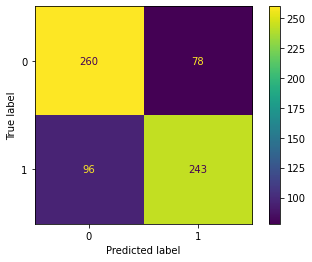

In [1268]:
ConfusionMatrixDisplay(cm_train).plot()

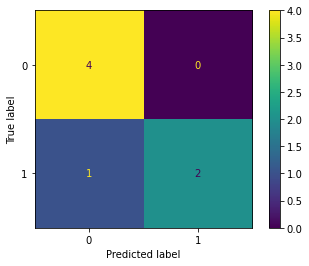

In [1269]:
ConfusionMatrixDisplay(cm_test).plot()

In [1270]:
X = test_df.drop(columns=['source','PassengerId','Survived'])

In [1271]:
y_pred = model.predict(X)

In [1272]:
pd.Series(y_pred).value_counts(dropna=False)

0.0    250
1.0    168
dtype: int64

In [1273]:
submission_df.head() 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1274]:
X.head().T

,0,1,2,3,4
Age,0.443052,1.397827,2.543557,-0.129813,-0.511722
SibSp,0.000000,1.000000,0.000000,0.000000,1.000000
Parch,0.000000,0.000000,0.000000,0.000000,1.000000
Fare,-0.492725,-0.508761,-0.456789,-0.476611,-0.406510
Fare_log,2.057860,1.945910,2.270836,2.159003,2.508582
Sex_female,0.000000,1.000000,0.000000,0.000000,1.000000
Sex_male,1.000000,0.000000,1.000000,1.000000,0.000000
Embarked_C,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_Q,1.000000,0.000000,1.000000,0.000000,0.000000
Embarked_S,0.000000,1.000000,0.000000,1.000000,1.000000


In [1280]:
output = pd.DataFrame()
output['PassengerId'] = test_df['PassengerId']
output['Survived'] = pd.Series((y_pred)).astype(int)

In [1281]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [1282]:
output.to_csv("LogisticRegression_Titanic-output/TitanicSurvival.csv", index=False)